In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report

In [4]:
df = pd.read_csv("../Datasets/training.csv")
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


## Data Cleaning/ Feature Engineering

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [6]:
df["TransactionStartTime"] = pd.to_datetime(df["TransactionStartTime"])

In [11]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult,Month,Days
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018,6.566233,15.902898
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872,5.224310,8.962822
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000,1.000000,1.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000,1.000000,8.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000,11.000000,16.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000,12.000000,24.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000,12.000000,31.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  object             
 8   ProductId             95662 non-null  object             
 9   ProductCategory       95662 non-null  object             
 10  ChannelId             95662 non-null  object             
 11  Amount                95662 non-null  float64            
 12  Valu

In [8]:
df["Month"] = df["TransactionStartTime"].dt.month

In [9]:
df["Days"] = df["TransactionStartTime"].dt.day

In [10]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Month,Days
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,11,15
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,11,15
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,11,15
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,11,15
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,11,15


In [12]:
def credit(x):
    if x > 0:
        return 1 #representing credit
    else:
        return 0 #representing debit

In [13]:
df["isCredit"] = df["Amount"].apply(credit)

In [14]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Month,Days,isCredit
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,11,15,1
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,11,15,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,11,15,1
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,11,15,1
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,11,15,0


In [15]:
X = df.drop(columns=["TransactionId", "CurrencyCode", "CountryCode","Amount", "FraudResult", "TransactionStartTime"])

In [16]:
X

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Value,PricingStrategy,Month,Days,isCredit
0,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000,2,11,15,1
1,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,20,2,11,15,0
2,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,500,2,11,15,1
3,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,21800,2,11,15,1
4,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,ProductId_6,financial_services,ChannelId_2,644,2,11,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,ProviderId_4,ProductId_6,financial_services,ChannelId_2,1000,2,2,13,0
95658,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000,2,2,13,1
95659,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,ProviderId_4,ProductId_6,financial_services,ChannelId_2,20,2,2,13,0
95660,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,ProviderId_6,ProductId_19,tv,ChannelId_3,3000,2,2,13,1


In [17]:
y = df["FraudResult"]

In [18]:
y

0        0
1        0
2        0
3        0
4        0
        ..
95657    0
95658    0
95659    0
95660    0
95661    0
Name: FraudResult, Length: 95662, dtype: int64

## Feature Encoding

In [22]:
cat_cols = X.select_dtypes(include="object").columns.tolist()

cat_cols

['BatchId',
 'AccountId',
 'SubscriptionId',
 'CustomerId',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId']

In [23]:
le = LabelEncoder()

for i in cat_cols:
    X[i] = le.fit_transform(X[i])
    

In [25]:
X.head()

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Value,PricingStrategy,Month,Days,isCredit
0,46980,2490,3535,2584,5,1,0,2,1000,2,11,15,1
1,31755,3219,2366,2584,3,19,2,1,20,2,11,15,0
2,60272,2713,996,2806,5,0,0,2,500,2,11,15,1
3,1797,3351,974,3733,0,11,8,2,21800,2,11,15,1
4,48941,3219,2366,3733,3,19,2,1,644,2,11,15,0


## Feature Correlation

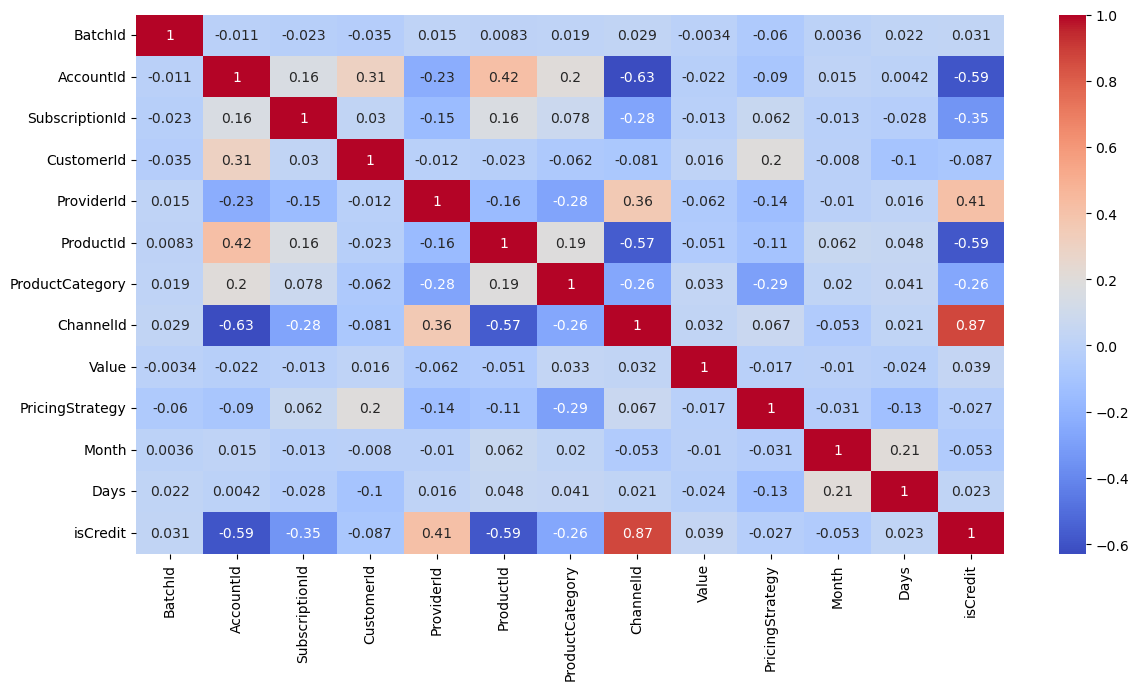

In [26]:
plt.figure(figsize=(14,7))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")

plt.show()

## Feature Scaling

In [27]:
scaler = StandardScaler()

scaleX = scaler.fit_transform(X)

In [28]:
scaleX

array([[-0.01556319,  0.1537132 ,  1.6686459 , ...,  0.84868424,
        -0.10073863,  0.81514939],
       [-0.57173322,  0.86719027,  0.34644914, ...,  0.84868424,
        -0.10073863, -1.22676899],
       [ 0.46999424,  0.37196476, -1.20308855, ...,  0.84868424,
        -0.10073863,  0.81514939],
       ...,
       [-1.22430605,  0.86719027,  0.34644914, ..., -0.87404014,
        -0.32388379, -1.22676899],
       [ 0.93546015, -1.99356897,  1.45261547, ..., -0.87404014,
        -0.32388379,  0.81514939],
       [-0.19708102,  0.86719027,  0.34644914, ..., -0.87404014,
        -0.32388379, -1.22676899]])

In [30]:
y.value_counts() #this shows a highly unbalanced dataset

FraudResult
0    95469
1      193
Name: count, dtype: int64

In [31]:
# therefore ensure whatever evaluation metric for the  model you are using 
#does well on the lesser class in the dataset

In [33]:
X_train, X_test, y_train, y_test = train_test_split(scaleX, y, test_size=0.2, random_state=45)

In [34]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression()

In [35]:
log_pred = log_reg.predict(X_test)

log_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
accuracy_score(y_test, log_pred)

0.9980661684001464

In [40]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19089
           1       0.65      0.34      0.45        44

    accuracy                           1.00     19133
   macro avg       0.83      0.67      0.72     19133
weighted avg       1.00      1.00      1.00     19133

